In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
residuos_españa = pd.read_csv("..\Data\Residuos Generados por Comunidad.csv",sep=";")
residuos_españa


,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
0,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2021,16.854.362
1,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2020,16.452.778
2,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2019,17.034.229
3,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2018,17.611.068
4,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2017,17.457.709
...,...,...,...,...,...
3883,TOTAL RESIDUOS,Total Nacional,17 La Rioja,2014,125.295
3884,TOTAL RESIDUOS,Total Nacional,17 La Rioja,2013,129.965
3885,TOTAL RESIDUOS,Total Nacional,17 La Rioja,2012,124.602
3886,TOTAL RESIDUOS,Total Nacional,17 La Rioja,2011,129.798


In [3]:
residuos_españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Tipo de residuo                   3888 non-null   object
 1   Total Nacional                    3888 non-null   object
 2   Comunidades y Ciudades Autónomas  3672 non-null   object
 3   periodo                           3888 non-null   int64 
 4   Total                             3888 non-null   object
dtypes: int64(1), object(4)
memory usage: 152.0+ KB


In [4]:
residuos_españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Tipo de residuo                   3888 non-null   object
 1   Total Nacional                    3888 non-null   object
 2   Comunidades y Ciudades Autónomas  3672 non-null   object
 3   periodo                           3888 non-null   int64 
 4   Total                             3888 non-null   object
dtypes: int64(1), object(4)
memory usage: 152.0+ KB


In [5]:
# Ver las comunidades que están en el tablero

residuos_españa.loc[:,"Comunidades y Ciudades Autónomas"].unique()

array([nan, '01 Andalucía', '02 Aragón', '03 Principado de Asturias',
       '04 Illes Baleares', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Comunidad de Madrid', '14 Región de Murcia',
       '15 Comunidad Foral Navarra', '16 País Vasco', '17 La Rioja'],
      dtype=object)

In [6]:
residuos_españa.loc[:, "Tipo de residuo"].value_counts()

Tipo de residuo
10.1.1 Residuos domésticos y similares (domésticos y vías públicas)                            216
10.1.2 Residuos domésticos voluminosos mezclados (enseres domésticos)                          216
TOTAL RESIDUOS DE RECOGIDA SEPARADA                                                            216
TOTAL RESIDUOS MEZCLADOS                                                                       216
18 Otros                                                                                       216
12 Residuos minerales (incluye residuos de construcción y demolición)                          216
11 Lodos comunes (secos)                                                                       216
10.21 Envases mixtos y embalajes mezclados                                                     216
09. Residuos animales y vegetales                                                              216
08.41 Residuos de pilas y acumuladores                                                       

In [7]:
# Eliminación de espacios en las columnas

residuos_españa.columns = residuos_españa.columns.str.strip()

In [8]:
# # Eliminación de los prefijos en la columna "Comunidades y Ciudades Autónomas"

residuos_españa.loc[:,"Comunidades y Ciudades Autónomas"] = residuos_españa.loc[:, "Comunidades y Ciudades Autónomas"].str.strip().str[2:]

In [9]:
# Transformación tipo de dato columna Total a enteros

residuos_españa["Total"] = residuos_españa['Total'].str.strip().str.replace(".", "").str.replace(",", ".").astype(int)

In [10]:
# Columnas de "Comunidades y Ciudades Autónomas" lo hago de nuevo

residuos_españa["Comunidades y Ciudades Autónomas"] = residuos_españa["Comunidades y Ciudades Autónomas"].str.strip()

In [11]:
# Los valores Nan coinciden con las cuentas nacionales, así que le cambio el nombre y rellenos esos campos

# residuos_españa.fillna("Nacional", inplace=True)

In [12]:
residuos_españa.loc[:,"Comunidades y Ciudades Autónomas"].value_counts()

Comunidades y Ciudades Autónomas
Andalucía                  216
Comunitat Valenciana       216
País Vasco                 216
Comunidad Foral Navarra    216
Región de Murcia           216
Comunidad de Madrid        216
Galicia                    216
Extremadura                216
Cataluña                   216
Aragón                     216
Castilla - La Mancha       216
Castilla y León            216
Cantabria                  216
Canarias                   216
Illes Baleares             216
Principado de Asturias     216
La Rioja                   216
Name: count, dtype: int64

In [13]:
residuos_españa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Tipo de residuo                   3888 non-null   object
 1   Total Nacional                    3888 non-null   object
 2   Comunidades y Ciudades Autónomas  3672 non-null   object
 3   periodo                           3888 non-null   int64 
 4   Total                             3888 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 136.8+ KB


In [14]:
# Modifico el tipo de la columna total por enteros

residuos_españa["Total"] = residuos_españa["Total"].astype(int)

In [15]:
# Modifico el tipo de la columna periodo por tiempo

residuos_españa["periodo"] = pd.to_datetime(residuos_españa['periodo'],format='ISO8601')

In [16]:
# residuos_españa.to_csv("residuos_españa_normalizado", i)


In [17]:
residuos_españa["Comunidades y Ciudades Autónomas"].unique()

array([nan, 'Andalucía', 'Aragón', 'Principado de Asturias',
       'Illes Baleares', 'Canarias', 'Cantabria', 'Castilla y León',
       'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'Comunidad de Madrid',
       'Región de Murcia', 'Comunidad Foral Navarra', 'País Vasco',
       'La Rioja'], dtype=object)

# Residuos españa orgánicos

In [18]:
residuos_españa.loc[:,"Tipo de residuo"] == "10.1.1 Residuos domésticos y similares (domésticos y vías públicas)"
organicos = residuos_españa[residuos_españa.loc[:,"Tipo de residuo"] == "10.1.1 Residuos domésticos y similares (domésticos y vías públicas)"]
organicos

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
0,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2021-01-01,16854362
1,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2020-01-01,16452778
2,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2019-01-01,17034229
3,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2018-01-01,17611068
4,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2017-01-01,17457709
...,...,...,...,...,...
211,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,La Rioja,2014-01-01,104691
212,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,La Rioja,2013-01-01,103026
213,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,La Rioja,2012-01-01,104789
214,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,La Rioja,2011-01-01,109774


In [19]:
organicos_2021 = organicos[organicos.loc[:,"periodo"] == "2021-01-01"]
organicos_2021

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
0,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,NaN,2021-01-01,16854362
12,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Andalucía,2021-01-01,3921264
24,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Aragón,2021-01-01,454672
36,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Principado de Asturias,2021-01-01,387187
48,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Illes Baleares,2021-01-01,503732
60,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Canarias,2021-01-01,979325
72,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Cantabria,2021-01-01,244288
84,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Castilla y León,2021-01-01,892278
96,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Castilla - La Mancha,2021-01-01,773922
108,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Cataluña,2021-01-01,2020834


In [20]:
organicos_2021 = organicos_2021.sort_values(by='Total', ascending=True)

In [21]:
# sns.histplot(data=organicos_2021, kde=)

Text(0.5, 0, 'Millones de toneladas')

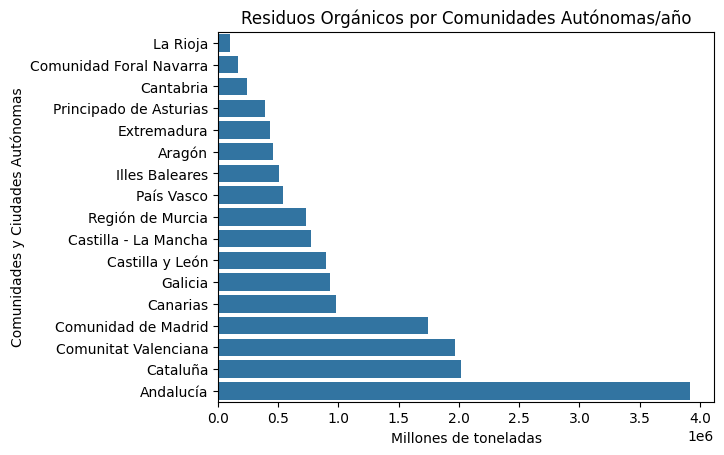

In [22]:
sns.barplot(data = organicos_2021, x= "Total", y="Comunidades y Ciudades Autónomas")
plt.title("Residuos Orgánicos por Comunidades Autónomas/año")
plt.xlabel("Millones de toneladas")

## TOTAL RESIDUOS

In [23]:
residuos_españa.loc[:,"Tipo de residuo"] == "TOTAL RESIDUOS"
Total_españa = residuos_españa[residuos_españa.loc[:,"Tipo de residuo"] == "TOTAL RESIDUOS"]
Total_españa

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
3672,TOTAL RESIDUOS,Total Nacional,NaN,2021-01-01,22676937
3673,TOTAL RESIDUOS,Total Nacional,NaN,2020-01-01,21729230
3674,TOTAL RESIDUOS,Total Nacional,NaN,2019-01-01,22761799
3675,TOTAL RESIDUOS,Total Nacional,NaN,2018-01-01,22686134
3676,TOTAL RESIDUOS,Total Nacional,NaN,2017-01-01,22515181
...,...,...,...,...,...
3883,TOTAL RESIDUOS,Total Nacional,La Rioja,2014-01-01,125295
3884,TOTAL RESIDUOS,Total Nacional,La Rioja,2013-01-01,129965
3885,TOTAL RESIDUOS,Total Nacional,La Rioja,2012-01-01,124602
3886,TOTAL RESIDUOS,Total Nacional,La Rioja,2011-01-01,129798


In [24]:
total_2021 = Total_españa[Total_españa.loc[:,"periodo"] == "2021-01-01"]
total_2021

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
3672,TOTAL RESIDUOS,Total Nacional,NaN,2021-01-01,22676937
3684,TOTAL RESIDUOS,Total Nacional,Andalucía,2021-01-01,4618566
3696,TOTAL RESIDUOS,Total Nacional,Aragón,2021-01-01,600073
3708,TOTAL RESIDUOS,Total Nacional,Principado de Asturias,2021-01-01,515448
3720,TOTAL RESIDUOS,Total Nacional,Illes Baleares,2021-01-01,714685
3732,TOTAL RESIDUOS,Total Nacional,Canarias,2021-01-01,1196050
3744,TOTAL RESIDUOS,Total Nacional,Cantabria,2021-01-01,302260
3756,TOTAL RESIDUOS,Total Nacional,Castilla y León,2021-01-01,1079647
3768,TOTAL RESIDUOS,Total Nacional,Castilla - La Mancha,2021-01-01,907584
3780,TOTAL RESIDUOS,Total Nacional,Cataluña,2021-01-01,3556903


In [25]:
total_2021 = total_2021.sort_values(by='Total', ascending=True)

C:\Users\vipre\AppData\Local\Temp\ipykernel_8536\3634306618.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_2021, x= "Total", y="Comunidades y Ciudades Autónomas", palette="muted")


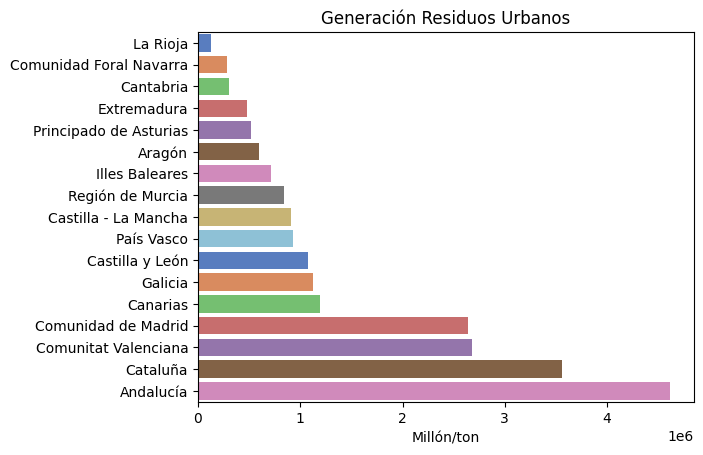

In [26]:
sns.barplot(data = total_2021, x= "Total", y="Comunidades y Ciudades Autónomas", palette="muted")
plt.title("Generación Residuos Urbanos")
plt.xlabel("Millón/ton")
plt.ylabel("")
plt.show()

In [27]:
# https://pegv.gva.es/es/estad%C3%ADstica-sobre-recollida-i-i-tractament-de-residus

In [28]:
# Filter the dataframe to select only the rows where "Comunidades y Ciudades Autónomas" is "Comunitat Valenciana"
residuos_españa[residuos_españa.loc[:,"Comunidades y Ciudades Autónomas"] == "Comunitat Valenciana"]


,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
120,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2021-01-01,1967712
121,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2020-01-01,1949731
122,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2019-01-01,2040908
123,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2018-01-01,2050369
124,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2017-01-01,2014008
...,...,...,...,...,...
3799,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2014-01-01,2166596
3800,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2013-01-01,2141608
3801,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2012-01-01,2148962
3802,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2011-01-01,2221793


In [29]:
residuos_valencia = residuos_españa.loc[:, "Comunidades y Ciudades Autónomas"] == "Comunitat Valenciana"

In [30]:
valencia = residuos_españa[residuos_valencia]

In [31]:
valencia

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
120,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2021-01-01,1967712
121,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2020-01-01,1949731
122,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2019-01-01,2040908
123,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2018-01-01,2050369
124,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2017-01-01,2014008
...,...,...,...,...,...
3799,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2014-01-01,2166596
3800,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2013-01-01,2141608
3801,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2012-01-01,2148962
3802,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2011-01-01,2221793


In [32]:
valencia.loc[:, "Tipo de residuo"].value_counts()

Tipo de residuo
10.1.1 Residuos domésticos y similares (domésticos y vías públicas)                            12
10.1.2 Residuos domésticos voluminosos mezclados (enseres domésticos)                          12
TOTAL RESIDUOS DE RECOGIDA SEPARADA                                                            12
TOTAL RESIDUOS MEZCLADOS                                                                       12
18 Otros                                                                                       12
12 Residuos minerales (incluye residuos de construcción y demolición)                          12
11 Lodos comunes (secos)                                                                       12
10.21 Envases mixtos y embalajes mezclados                                                     12
09. Residuos animales y vegetales                                                              12
08.41 Residuos de pilas y acumuladores                                                         12
08.2

In [33]:
total_valencia = valencia[valencia.loc[:,"Tipo de residuo"]=="TOTAL RESIDUOS"]

In [34]:
total_valencia

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
3792,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2021-01-01,2680972
3793,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2020-01-01,2392953
3794,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2019-01-01,2497277
3795,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2018-01-01,2544874
3796,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2017-01-01,2434749
3797,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2016-01-01,2209773
3798,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2015-01-01,2187379
3799,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2014-01-01,2166596
3800,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2013-01-01,2141608
3801,TOTAL RESIDUOS,Total Nacional,Comunitat Valenciana,2012-01-01,2148962


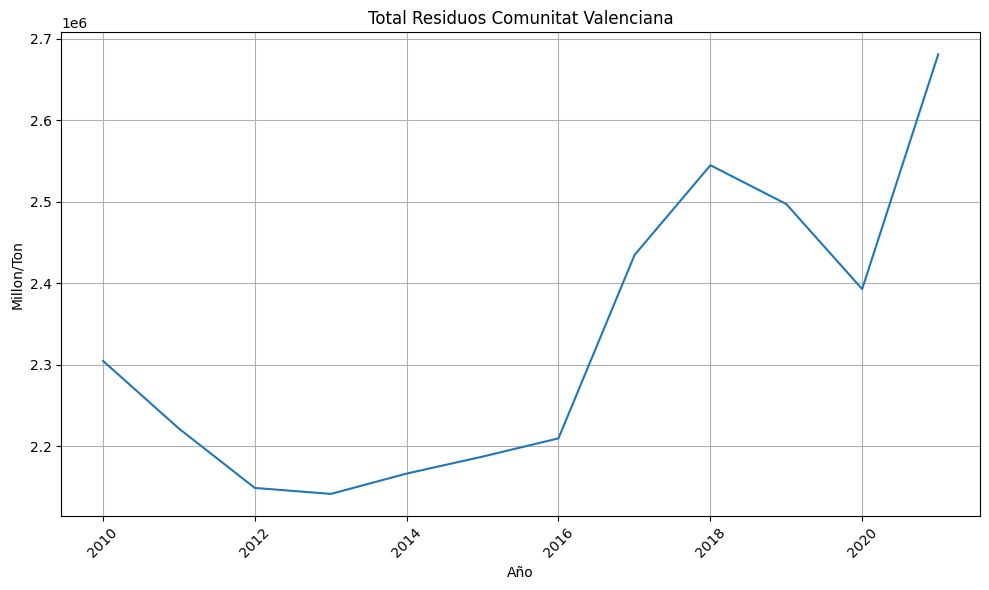

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_valencia, x='periodo', y='Total')


plt.xlabel('Año')
plt.ylabel('Millon/Ton')
plt.title('Total Residuos Comunitat Valenciana')


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

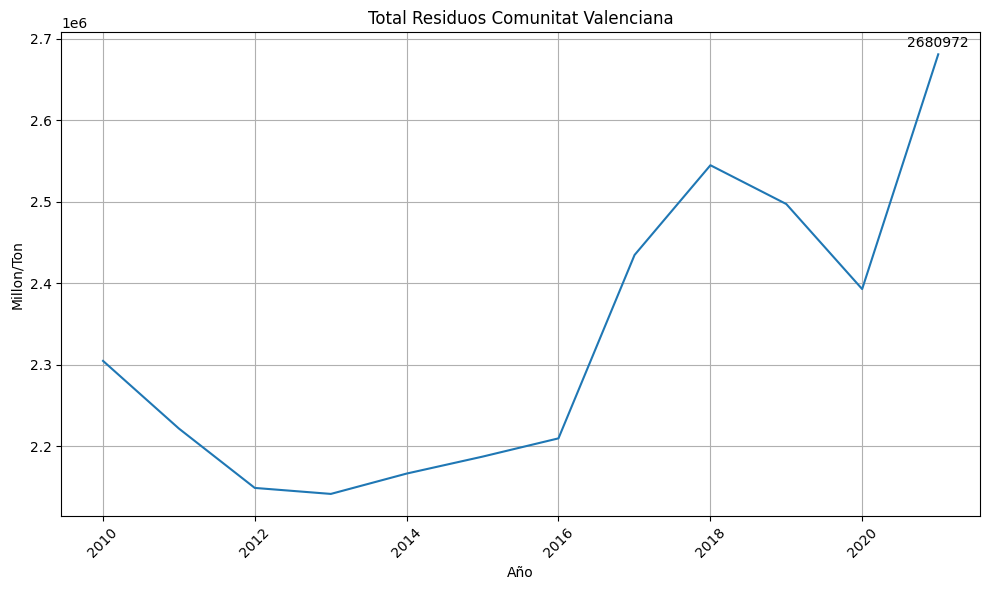

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_valencia, x='periodo', y='Total')

plt.xlabel('Año')
plt.ylabel('Millon/Ton')
plt.title('Total Residuos Comunitat Valenciana')


plt.xticks(rotation=45)
plt.grid(True)


last_period = total_valencia['periodo'].iloc[0]  
last_total = total_valencia['Total'].iloc[0]     
plt.annotate(f'{last_total}',                    
             (last_period, last_total),          
             textcoords="offset points",
             xytext=(0,5),                       
             ha='center')                        

plt.tight_layout()
plt.show()

In [37]:
# Todos tipos de residuos Valencia 2021

valencia_2021 = valencia[valencia.loc[:,"periodo"] == "2021'-01-01"]


In [38]:
valencia_2021

,Tipo de residuo,Total Nacional,Comunidades y Ciudades Autónomas,periodo,Total
120,10.1.1 Residuos domésticos y similares (domést...,Total Nacional,Comunitat Valenciana,2021-01-01,1967712
336,10.1.2 Residuos domésticos voluminosos mezclad...,Total Nacional,Comunitat Valenciana,2021-01-01,12316
552,06 Residuos metálicos,Total Nacional,Comunitat Valenciana,2021-01-01,2480
768,07.1 Residuos de vidrio,Total Nacional,Comunitat Valenciana,2021-01-01,85701
984,07.2 Residuos de papel y cartón,Total Nacional,Comunitat Valenciana,2021-01-01,308292
1200,07.4 Residuos de plásticos,Total Nacional,Comunitat Valenciana,2021-01-01,882
1416,07.5 Residuos de Madera,Total Nacional,Comunitat Valenciana,2021-01-01,14190
1632,07.6 Residuos textiles,Total Nacional,Comunitat Valenciana,2021-01-01,5522
1848,08.2 y 08.43 Equipos eléctricos desechados y C...,Total Nacional,Comunitat Valenciana,2021-01-01,1833
2064,08.41 Residuos de pilas y acumuladores,Total Nacional,Comunitat Valenciana,2021-01-01,46
